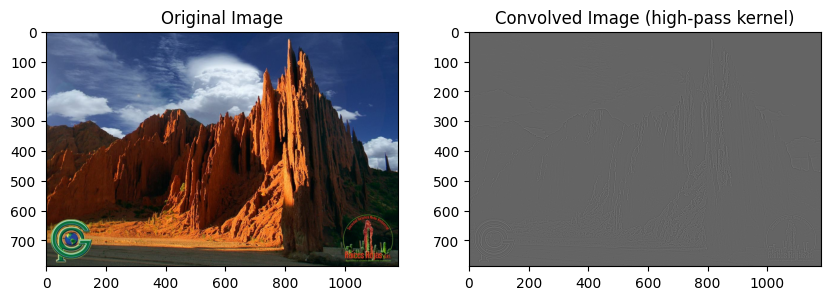

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image

def apply_convolution(image, kernel_type, kernel_size):
    if kernel_type == 'high-pass':
        kernel = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])
    elif kernel_type == 'low-pass':
        kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    else:
        raise ValueError("Invalid kernel type. Supported types: 'high-pass', 'low-pass'")
    
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)
    
    convolved_image = np.zeros_like(image)
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    kernel_half_height = kernel_height // 2
    kernel_half_width = kernel_width // 2
    
    for y in range(kernel_half_height, image_height - kernel_half_height):
        for x in range(kernel_half_width, image_width - kernel_half_width):
            window = image[y - kernel_half_height:y + kernel_half_height + 1,
                           x - kernel_half_width:x + kernel_half_width + 1]
            convolved_image[y, x] = np.sum(window * kernel)
    
    return convolved_image

image_path = 'image.jpg'
image = np.array(Image.open(image_path))

kernel_type = 'high-pass' 
kernel_size = 3

convolved_image = apply_convolution(image, kernel_type, kernel_size)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title(f'Convolved Image ({kernel_type} kernel)')
plt.show()
